# The Gymnasium Environments
Gymnasium, previously gym, is a standard API for reinforcement Learning, with reference environments included.

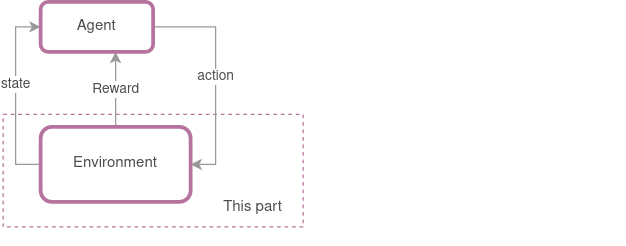

---

### Install Necessary Packages
Restart the kernel to make sure new packages can be successfully found.

In [2]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Create an instance of an envrionment


In [3]:
import gymnasium as gym
env = gym.make("CartPole-v1", render_mode="rgb_array")

### You can play it as a game:

In [4]:
from gymnasium.utils.play import play
from IPython.display import display

mapping = {
    "a": 0,
    "d": 1
}

def callback(state_1, state_2, action, reward, *_):
    display("action: {:6} reward: {:6}".format(
        "right" if action == 1 else "left",
        reward
    ), clear=True)

play(env, keys_to_action=mapping, fps=5, callback=callback)

'action: left   reward:    1.0'

### apply a policy (random policy here):

In [5]:
def probe(obs, act):
    display("observation: {} action: {}".format(obs, act), clear=True)

def random_policy(obs, callback=None):
    act = env.action_space.sample()
    if callback:
        callback(obs, act)
    return act

def simulate(policy, env, steps=1000, policy_callback=None):
    obs, info = env.reset()
    for _ in range(steps):
        action = policy(obs, policy_callback)
        obs, reward, terminated, truncated, info = env.step(action)
    
        if terminated or truncated:
            obs, info = env.reset()
    env.close()

simulate(random_policy, env, policy_callback=probe)

'observation: [-0.03115116  0.40110052  0.00177133 -0.597774  ] action: 0'

To decode the observation and action from vector and scalar, check the [document](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

### Or a RL agent:

In [6]:
import torch
from DQN.dqn import DQN, DQNTrainer, EpsGreedy
from itertools import count

env = gym.make("CartPole-v1", render_mode="human")

dim_state = env.observation_space.shape[0]
n_actions = env.action_space.n

q_net = DQN(dim_state, n_actions)
q_net.load("DQN/q_net.pth")

policy = EpsGreedy(q_net)

state, _ = env.reset()
for _ in count():
    action = policy.get_action(state)
    state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break
env.close()

/Users/yingmanyouyu/Desktop/待看代码/Tutorial 9 DQN/DQN/dqn.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.net.load_state_dict(torch.load(path))


### To modify environment
Use wrapper to change the environment.

For example, to change observation from 4-dimensional vector to visual observation:

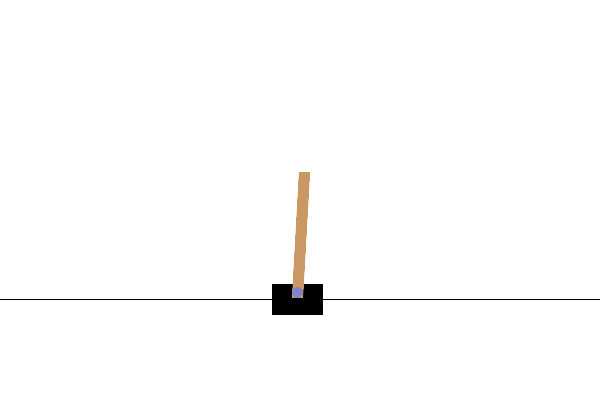

'action: 0'

: 

In [ ]:
from PIL import Image
import time

class OnlyPixel(gym.ObservationWrapper):
  """
  Wrapping PixelObservationWrapper to make it really pixel only.
  """
  def __init__(self, env):
        super().__init__(env)
        self.env = gym.wrappers.AddRenderObservation(env, render_only=True)
    
  def observation(self, observation):
        return observation


def pixelProbe(obs, act):
    display(Image.fromarray(obs), "action: {}".format(act), clear=True)
    time.sleep(0.05)

env = gym.make("CartPole-v1", render_mode="rgb_array")
pixelEnv = OnlyPixel(env)
simulate(random_policy, pixelEnv, policy_callback=pixelProbe)
